In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Car Price Prediction (Basic Project)

### Import librariries and data set


In [2]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mini Project - CarD/car data.csv')

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Fuel_Type	Seller_TAype	Transmission	Owner these are my cat features : 

In [3]:
print("Seller_type : "+" "+df.Seller_Type.unique())
print("Transmission: "+" "+df.Transmission	.unique())
print("Fuel_Type: "+" "+df.Fuel_Type.unique())
print("Owner: "+" "+str(df['Owner'].unique()))

['Seller_type :  Dealer' 'Seller_type :  Individual']
['Transmission:  Manual' 'Transmission:  Automatic']
['Fuel_Type:  Petrol' 'Fuel_Type:  Diesel' 'Fuel_Type:  CNG']
Owner:  [0 1 3]


## Feature Engineering

### Check missign or null values


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

1.   So now we see in the data set we have the **year** column, we are going to a column called 'Age of car' by subtracting it with current year. This will tell us how old the car is which will impact the price of the car

2. We will also be removing the column 'car-name' as it wont impact in predicting the price of the new car 

In [4]:
fdf =df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
fdf

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
fdf['Current_year'] = 2020
fdf

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020


In [6]:
fdf['Age_car'] = fdf['Current_year']-fdf['Year'] 
fdf

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Age_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


#### Now we dont need the 2 columns year and Current_year hence we drop them

In [7]:
#fdf.drop(['Year','Current_year'],axis=1,inplace=True)
fdf

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


#### Encoding

In [8]:
fdf = pd.get_dummies(fdf,drop_first=True)
fdf.head(3)
#check out about dummy variable trap

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1


In [9]:
fdf1 = fdf[['Selling_Price', 'Present_Price']]
fdf1 = pd.get_dummies(fdf1, drop_first=True)

fdf1.head(3)
#this was done to clear the doubt that one hot encoding doesnt work on integers

,Selling_Price,Present_Price
0,3.35,5.59
1,4.75,9.54
2,7.25,9.85


### Visualising the correlation 

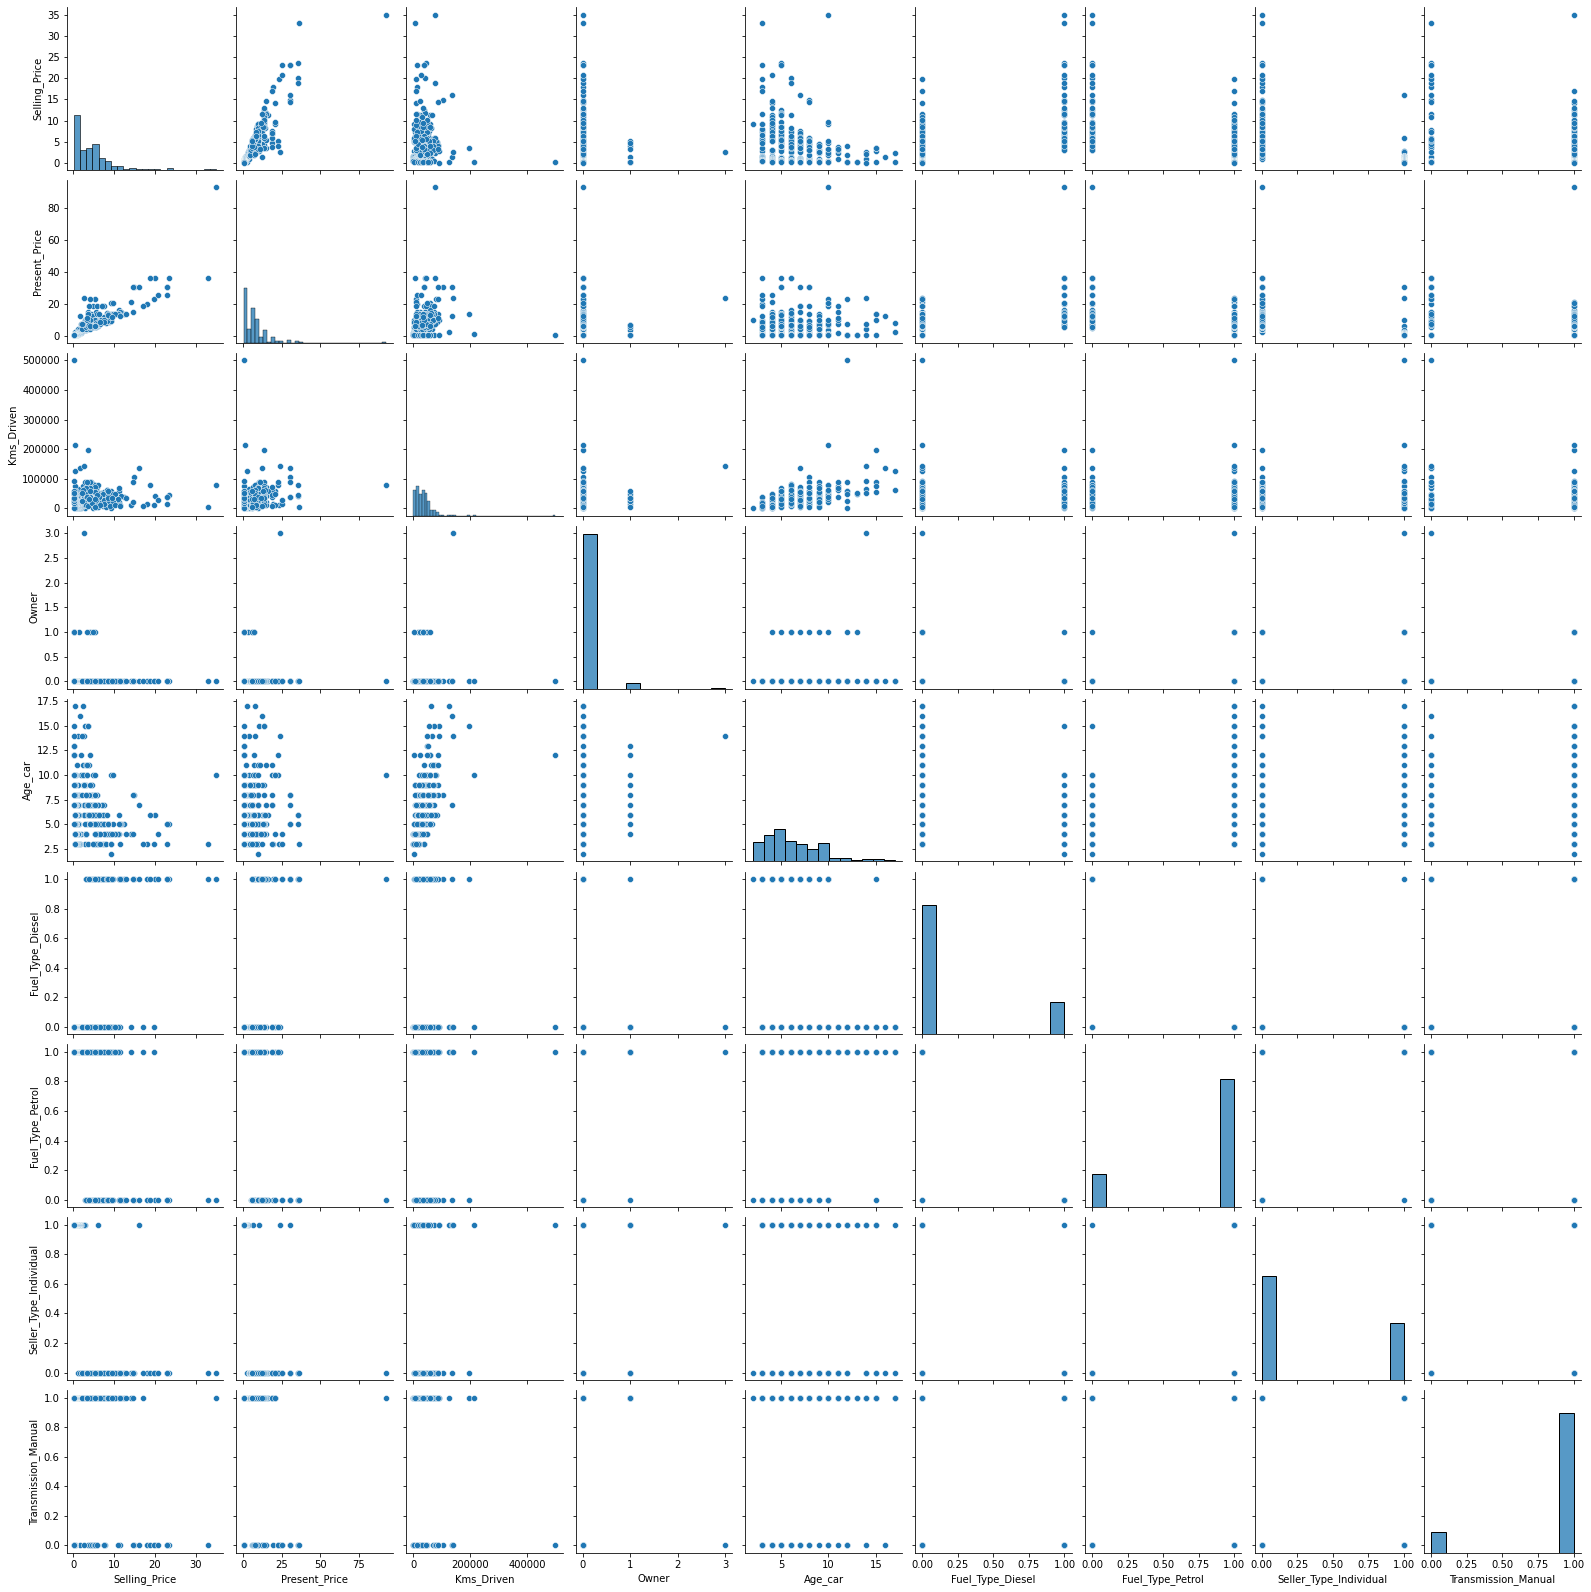

In [10]:
sns.pairplot(fdf)

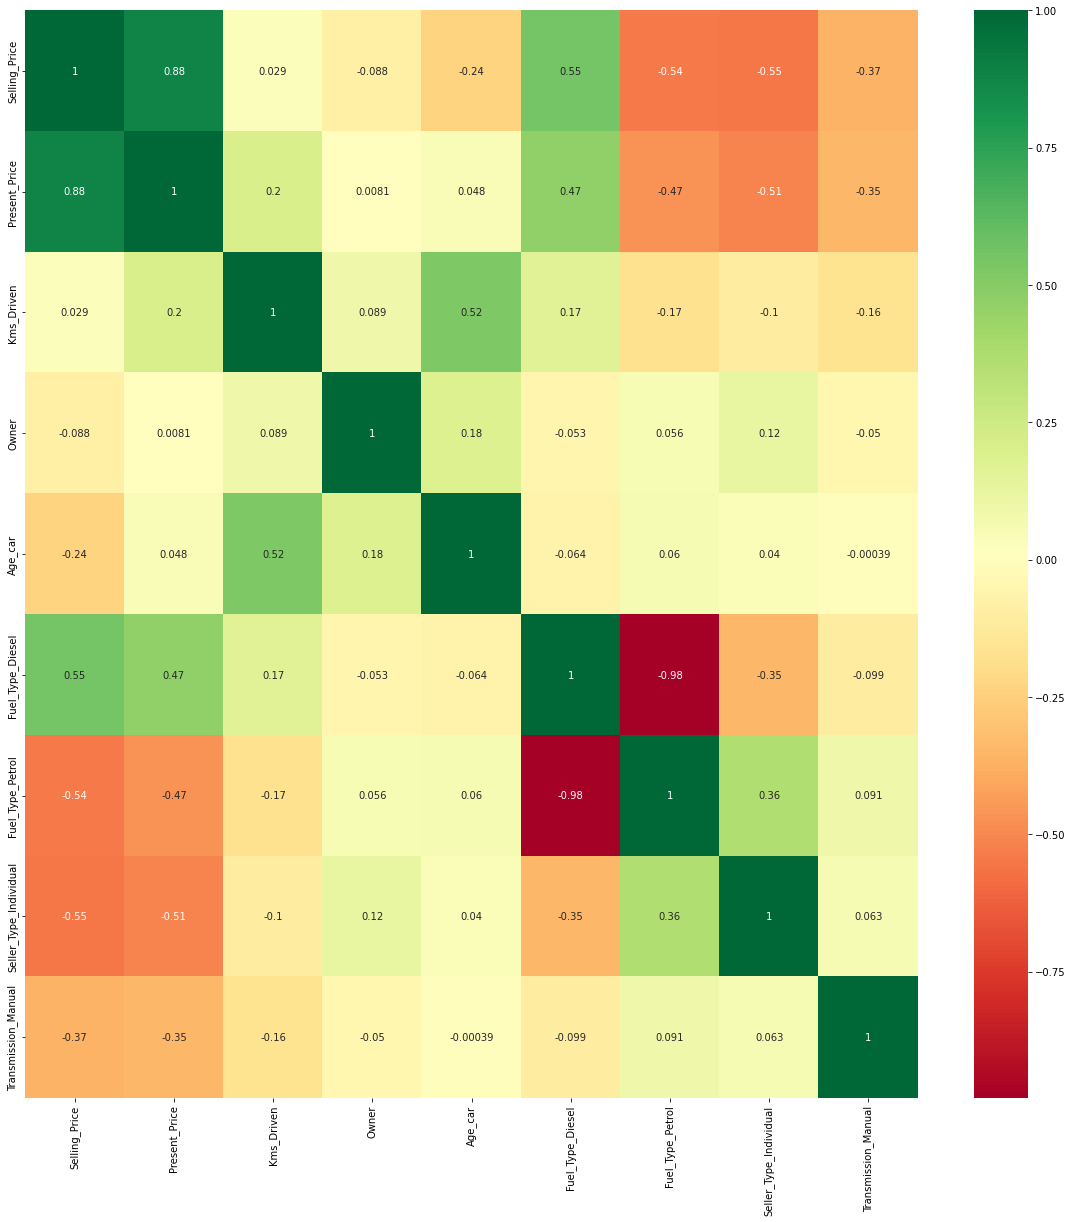

In [11]:
corr_mat = fdf.corr()
top_corr_feat = corr_mat.index#top_corr_features=corrmat.index 
plt.figure(figsize=(20,20))
#plot heat map 
g=sns.heatmap(fdf[top_corr_feat].corr(),annot=True,cmap="RdYlGn")

Here we see all the features that are +vely correlated and -vely correlated with target features but we dont drop them now, cause its a small data set. 

## Model

### Training and Testing 

In [12]:
x = fdf.iloc[:,1:]
y = fdf.Selling_Price

In [14]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [14]:
#now we find out the Feature importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [15]:
print(model.feature_importances_)

[3.67581220e-01 4.60792539e-02 3.59878758e-04 7.37925269e-02
 2.40275633e-01 8.39079574e-03 1.18703113e-01 1.44817580e-01]


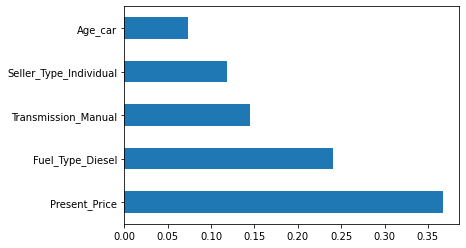

In [17]:
#now to plot the features
feat_imp = pd.Series(model.feature_importances_,index = x.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [19]:
#testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


### Model Implementation

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [40]:
#Hyper Parameters
import numpy as np
n_estimators= [int(x) for x in np.linspace(start=100,stop=1200,num=5)]
max_feat = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_leaf = [1,2,5,10]
min_samples_split = [2,5,15,100]

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
random_grid = { 'n_estimators' :n_estimators,'max_features':max_feat,
               'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,
               'min_samples_split':min_samples_split}
print(random_grid)

{'n_estimators': [100, 375, 650, 925, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 5, 15, 100]}


In [43]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions =random_grid,
                               scoring ='neg_mean_squared_error',n_iter=10,cv=5,
                               verbose=2,random_state =40,n_jobs=1)



In [44]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=375; total time=   0.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=375; total time=   0.8s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=375; total time=   0.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=375; total time=   0.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=375; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 15, 100],
                                        'n_estimators': [100, 375, 650, 925,
                                                         1200]},
                   random_state=40, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
#now we predict
predictions = rf_random.predict(x_test)

In [47]:
predictions


array([ 2.66429367,  1.10752088,  0.34870758,  0.58274736,  7.34086664,
        1.04041323,  4.34521306,  0.79949883,  7.42000324,  5.62674631,
        7.45023444,  5.18086934,  6.19122773,  0.41135587,  0.24948548,
        0.45888344,  0.74391047,  5.08960354,  3.29745053,  0.18772652,
        1.42829814,  4.75574418,  1.85990116,  7.80453842,  0.43948425,
        4.23321947,  2.44829032,  0.24824102,  3.31825588,  5.21032176,
       19.67788128,  0.46046442,  3.09419782,  1.12514561,  3.00590716,
        0.52357091,  4.30693976,  5.18667158,  6.65169805,  2.59995322,
        5.20171293,  5.91419803,  1.13372041,  0.64978564, 14.68000147,
       11.07672698,  5.62674631,  1.0933845 ,  3.15375986,  6.47273707,
        1.13382041,  4.35363282, 21.6768755 , 10.16663753,  0.41520215,
        0.55785433,  8.47600594,  6.70467216,  5.32889177,  4.16011937,
        0.79075901])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


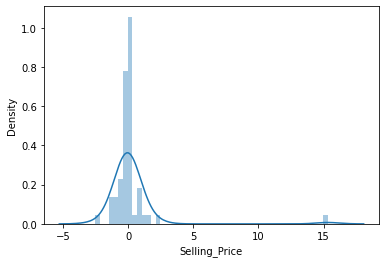

In [50]:
#now we compare
sns.distplot(y_test-predictions)

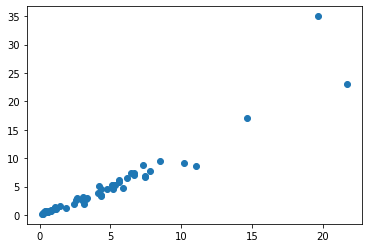

In [51]:
plt.scatter(predictions,y_test)

### Now we put this into a pickle file and 

In [53]:
import pickle

file = open('rfr_model.pkl','wb')

pickle.dump(rf_random,file)